In [29]:
# from mlpython.utils import array_to_vtk
import xarray as xr
import numpy as np
from mlpython.utils import compute_diss

In [ ]:

def array_to_vtk (h_ensem, ux_ensem, uy_ensem, uz_ensem, ichoice, 
                  filepath='/projects/DEIKE/jiarongw/multilayer/paraview/vtk/', 
                  L0=200, H=40, Nh=512, Nl=15):

    x_vtk = np.zeros([Nh+1,Nh+1,Nl+1])
    y_vtk = np.zeros([Nh+1,Nh+1,Nl+1])
    z_vtk = np.zeros([Nh+1,Nh+1,Nl+1])
    f_vtk = np.zeros([Nh,Nh,Nl])
    ux_vtk = np.zeros([Nh,Nh,Nl])
    uy_vtk = np.zeros([Nh,Nh,Nl])
    uz_vtk = np.zeros([Nh,Nh,Nl])

    h_ensem_expand = np.zeros([Nl,Nh+1,Nh+1]) # Need to go from centered to grid, pad the array
    h_ensem_expand[:,:Nh,:Nh] = np.copy(h_ensem) # Need to go from centered to grid
    h_ensem_expand[:,Nh,:Nh] = np.copy(h_ensem[:,Nh-1,:Nh])
    h_ensem_expand[:,:Nh,Nh] = np.copy(h_ensem[:,:Nh,Nh-1])
    h_ensem_expand[:,Nh,Nh] = np.copy(h_ensem[:,Nh-1,Nh-1])
    h_ensem_expand = np.array(h_ensem_expand)

    xarray = np.linspace(-L0/2, L0/2, Nh+1, endpoint=True)
    yarray = np.linspace(-L0/2, L0/2, Nh+1, endpoint=True)

    for k in range(Nl+1):
        for i in range(Nh+1):
            for j in range(Nh+1):
                z_vtk[i,j,k] = np.sum(h_ensem_expand[:k,i,j]) - H
                x_vtk[i,j,k] = xarray[i]
                y_vtk[i,j,k] = yarray[j]

    for k in range(Nl):
        for i in range(Nh):
            for j in range(Nh):
                ux_vtk[i,j,k] = ux_ensem[k,i,j]
                uy_vtk[i,j,k] = uy_ensem[k,i,j]
                uz_vtk[i,j,k] = uz_ensem[k,i,j]
                if k == Nl-1: # surface layer
                    f_vtk[i,j,k] = 0
                else:
                    f_vtk[i,j,k] = 1
                    
    gridToVTK(filepath + "structured_%g" %ichoice, x_vtk, y_vtk, z_vtk, cellData = {"f": f_vtk, "ux": ux_vtk, "uy": uy_vtk, "uz": uz_vtk})
    return x_vtk, y_vtk, z_vtk

In [32]:
path = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4/'
t = 120
ds = xr.open_dataset(path + f'field{t}.nc')
ds = ds.isel(t=0)
ds = compute_diss(ds)

In [59]:
ds

<xarray.Dataset>
Dimensions:  (zl: 15, x: 1024, y: 1024, x_g: 1024, y_g: 1024, zl_g: 15)
Coordinates:
  * x        (x) float64 -99.9 -99.71 -99.51 -99.32 ... 99.32 99.51 99.71 99.9
  * x_g      (x_g) float64 -100.0 -99.8 -99.61 -99.41 ... 99.22 99.41 99.61 99.8
  * y        (y) float64 -99.9 -99.71 -99.51 -99.32 ... 99.32 99.51 99.71 99.9
  * y_g      (y_g) float64 -100.0 -99.8 -99.61 -99.41 ... 99.22 99.41 99.61 99.8
  * zl       (zl) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * zl_g     (zl_g) float64 -0.5 0.5 1.5 2.5 3.5 4.5 ... 9.5 10.5 11.5 12.5 13.5
    z        (zl, x, y) float64 -35.38 -35.38 -35.38 ... 0.5669 0.53 0.5005
    z_g      (zl_g, x, y) float64 -40.0 -40.0 -40.0 ... 0.4292 0.3928 0.3635
Data variables: (12/18)
    h        (zl, x, y) float32 ...
    ux       (zl, x, y) float32 0.01165 0.01168 0.0117 ... 1.267 1.177 1.095
    uy       (zl, x, y) float32 -0.001199 -0.001168 ... -0.6137 -0.6588
    uz       (zl, x, y) float32 -0.0009068 -0.000917 ... 0.08555 -0.0312
    dudz     (zl, x, y) float64 -0.0007286 -0.000729 ... 0.3813 0.2778
    dudy     (zl, x, y) float64 0.0001014 0.0001257 0.0001237 ... -0.376 -0.3401
    ...       ...
    dwdx     (zl, x, y) float64 0.0002653 0.0004765 0.000637 ... 0.7513 0.6681
    epsilon  (zl, x, y) float64 3.859e-07 2.012e-07 1.456e-07 ... 3.002 2.552
    omegaxp  (zl, x, y) float64 1.61e-05 -0.0001327 ... -0.1948 -0.1472
    omegayp  (zl, x, y) float64 -0.0009939 -0.001206 -0.001366 ... -0.37 -0.3903
    omegazp  (zl, x, y) float64 2.379e-05 -6.807e-06 ... 0.04889 0.05593
    vort2    (zl, x, y) float64 9.886e-07 1.471e-06 1.888e-06 ... 0.1773 0.1771
Attributes:
    sourcepath:  /projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_...
    L:           200
    P:           0.02
    Re:          40000
    LEVEL:       10
    NL:          15
    rand:        2
    Htheta:      0.503
    H:           40.0
    label:       C4

In [31]:
import os
os.mkdir(path + 'paraview/')

In [64]:
from pyevtk.hl import gridToVTK

NL = ds.attrs['NL']
Nh = 2 ** ds.attrs['LEVEL']

x_vtk = np.append(ds.x_g.values, 2 * ds.x.values[-1] - ds.x_g.values[-1])
x_vtk_ = x_vtk[np.newaxis, :, np.newaxis] * np.ones((NL+1, 1, Nh+1))
y_vtk = np.append(ds.y_g.values, 2 * ds.y.values[-1] - ds.y_g.values[-1])
y_vtk_ = y_vtk[np.newaxis, np.newaxis, :] * np.ones((NL+1, Nh+1, 1))
z_vtk = np.append(ds.z_g.values, np.expand_dims(2 * ds.z.values[-1] - ds.z_g.values[-1], axis=0), axis=0)
z_vtk_ = np.zeros((16, 1025, 1025)); z_vtk_[:, :-1, :-1] = z_vtk
z_vtk_[:, -1, :-1] = z_vtk[:, 0, :]; z_vtk_[:, :-1, -1] = z_vtk[:, :, 0]; z_vtk_[-1, -1, -1] = z_vtk[-1, 0, 0]
z_vtk_ = z_vtk_ - 40

f = xr.DataArray(np.zeros_like(ds.ux), coords={'zl': ds.zl, 'x': ds.x, 'y': ds.y}, dims=['zl', 'x', 'y'])
f = f.where(ds.zl == NL-1, 1) # returns elements from ‘DataArray’, where ‘cond’ is True, otherwise fill in ‘other’.

gridToVTK('/Users/jiarongw/Data/multilayer_data/paraview/fields_alter_%g' %t, x_vtk_, y_vtk_, z_vtk_, 
          cellData = {"f": f.values, "ux": ds.ux.values, "uy": ds.uy.values, "uz": ds.uz.values,
                      'omegax': ds.omegaxp.values, 'omegay': ds.omegayp.values, 'omegaz': ds.omegazp.values,})

'/Users/jiarongw/Data/multilayer_data/paraview/fields_alter_120.vts'

In [58]:
z_vtk_.shape

(16, 1024, 1024)

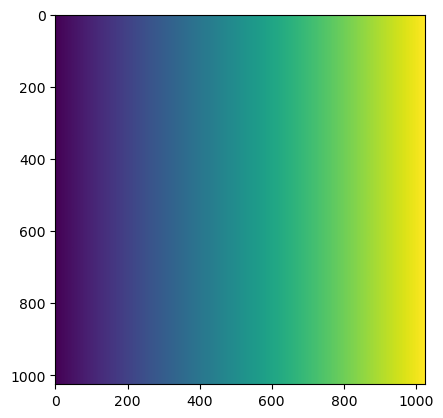

In [51]:
from matplotlib import pyplot as plt
plt.imshow(y_vtk_[1])